In [9]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.warp import reproject, Resampling
from rasterio.enums import Resampling

In [2]:
#from rasterio import features
with rasterio.open('vari/vari.tif') as dataset:
    vari = dataset.read(1).astype(np.float32)
    meta = dataset.meta

(array([1.91000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        7.00000e+00, 4.00000e+00, 3.00000e+00, 6.00000e+00, 8.00000e+00,
        1.80000e+01, 1.10000e+01, 1.60000e+01, 3.30000e+01, 5.20000e+01,
        7.00000e+01, 1.22000e+02, 1.99000e+02, 3.35000e+02, 5.76000e+02,
        9.73000e+02, 1.47200e+03, 2.68900e+03, 5.48000e+03, 1.08410e+04,
        2.36380e+04, 4.33400e+04, 8.20140e+04, 1.49506e+05, 2.94483e+05,
        5.83088e+05, 8.96460e+05, 1.03827e+06, 6.35820e+05, 1.41058e+05,
        5.11419e+05, 4.31450e+04, 4.22020e+04, 4.76710e+04, 5.75400e+04,
        6.77250e+04, 7.39170e+04, 7.75610e+04, 7.57010e+04, 7.17200e+04,
        7.28770e+04, 6.49360e+04, 5.89570e+04, 5.22660e+04, 4.55770e+04,
        4.11390e+04, 3.53250e+04, 3.01870e+04, 2.45

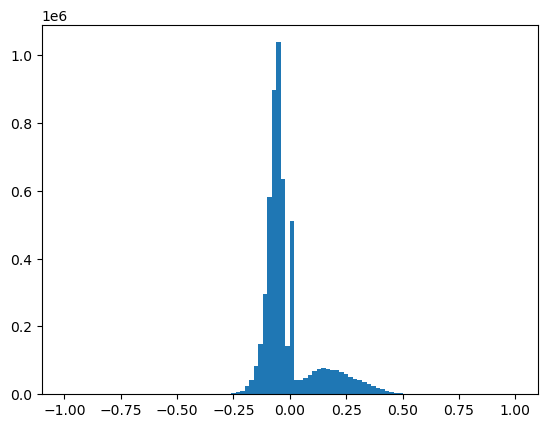

In [5]:
plt.hist(vari.flatten(), bins=100)

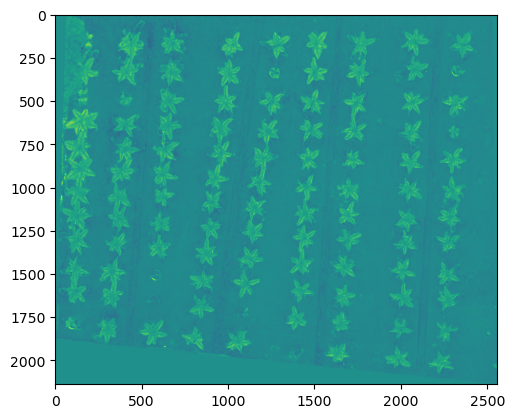

In [6]:
plt.imshow(vari)

In [15]:
# Example usage:
output_raster_path = 'out_raster/filtered_vari_bilinear_1.tif'
target_resolution = 1  # Set the desired target resolution

In [16]:
with rasterio.open('src_raster/filtered.tif') as src:
        # Read the raster data
    raster_data = src.read(1)

        # Get the metadata of the input raster
    meta = src.meta.copy()

    # Calculate the new dimensions based on the target resolution
    new_height = int(src.height * src.res[0] / target_resolution)
    new_width = int(src.width * src.res[1] / target_resolution)

        # Perform spatial interpolation using bilinear resampling
    interpolated_data = np.empty((new_height, new_width), dtype=raster_data.dtype)
    rasterio.warp.reproject(
            source=raster_data,
            destination=interpolated_data,
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            dst_crs=src.crs,
            resampling=Resampling.bilinear
    )

        # Update metadata with new dimensions and resolution
    meta.update({
            'width': new_width,
            'height': new_height,
            'transform': src.transform * src.transform.scale(
                (src.width / new_width), (src.height / new_height)
            ),
            'res': (target_resolution, target_resolution)
        })


In [17]:
        # Write the interpolated raster to the output file
with rasterio.open(output_raster_path, 'w', **meta) as dst:
    dst.write(interpolated_data, 1)